# <center>Concentration de CO2 dans l'atmosphère depuis 1958<center>

## <center>Rémy MARION<center>

## <center>Avril 2020<center>

### 1. Préambule

Dès 1958, Charles David Keeling a débuté la mesure précise du taux de CO2 dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis.  
Ces mesures, qui continuent aujourd'hui, ont permis de montrer une évolution périodique de CO2 dans l'hémisphère Nord. Celle-ci provenant du cycle de vie des plantes.  
De même, ces données ont montré une évolution continue du taux de CO2 dans l'atmosphère depuis 1958.

### 2. Travail à faire

Le but de l'exercide est de réaliser un document computationnel pour :
* Réaliser un graphique qui montrera une oscillation périodique superposée à une évolution systématique plus lente.
* Séparer ces deux phénomènes. Caractériser l'oscillation périodique et proposer un modèle simple de la contribution lente
* Estimer ses paramètres et tenter une extrapolation jusqu'à 2025 (dans le but de pouvoir valider le modèle par des observations futures).
* Déposer dans FUN le résultat.

### 3. Base de données

Les données sont disponibles sur le site Web de l'institut Scripps à l'adresse suivante:  
https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html

Pour notre étude, nous prendrons les relevés hebdomadaires : *weekly_in_situ_co2_mlo.csv* que l'on peut télécharger à l'adresse suiavnte : https://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo.html

Nous travaillerons sur une base locale (copiée sur le serveur *Jupyter* de l'INRIA) téléchargée le 13 avril 2020.
La totalité des documents nécessaires à cette étude seront committés sur le serveur *GitLab* de l'INRIA.

### 4. Vérification de la base de données

#### a. Exploration des données

Nous commencerons par analyser le contenu du fichier de données (fichier structuré *CSV*) pour ensuite faire un premier tracé de l'ensemble de la base de données.  
Nous utiliserons les libraries *pandas* et *matplotlib* pour *python 3.6*.

In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Chargement de la base de données (CSV)
# Les lignes de commentaires sont ignorées
# Le séparateur de champs utilisé dans la base de données est la virgule (,)
# La colonne des dates est parsé et mise en index
date_parser = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d') for d in dates]

data = pd.read_csv('weekly_in_situ_co2_mlo.csv', sep=',', comment='"', header=None,
                   names=["date", "CO2"])
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# Les dates sont passées à l'index du dataframe
data.set_index('date', inplace=True)
data.shape

(3156, 1)

Les 44 premières lignes de commentaires du fichier brut n'ont pas été prises en compte (commande `comment='"'`).  
La base de données est composée de 3156 mesures et de 2 colonnes :
* date : date de relevé. Avec un relevé par semaine.
* CO2 : concentration de CO2 en *ppm*.

In [3]:
# Affichage partiel de la base de données mise en forme
data.head(5)

CO2
date              
1958-03-29  316.19
1958-04-05  317.31
1958-04-12  317.69
1958-04-19  317.58
1958-04-26  316.48

L'inspection visuelle de la base de données complète montre que le fichier est bien formé et ne semble pas comporter de valeurs manquantes ou aberrantes.  

#### b. Vérification des données

Avant d'aller plus loin dans l'analyse, vérifions avec un code de validation la robustesse de la base de données. Nous vérifions la présence de valeurs manquantes et le type des variables (date, float).  
Par la suite, l'affichage sous forme graphique nous permettra d'avoir une vue globale de la base de données.

In [4]:
# La méthode .info() permet d'avoir une vision consice de la base de données
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3156 entries, 1958-03-29 to 2020-02-01
Data columns (total 1 columns):
CO2    3156 non-null float64
dtypes: float64(1)
memory usage: 49.3 KB


La base de données comporte 3156 lignes de valeurs numériques (float64) sans valeur manquante.  L'index est bien au format datetime allant du 29/03/1958 au 01/02/2020.

Nous pouvons considérer que la base de données est cohérente. L'analyse est donc possible.

### 5. Analyse des données

#### a. Mise en évidence des composantes de l'évolution de la concentration de CO2 dans les mesures

Un tracé sous forme graphique nosu permettra de constater les phénomènes.  
Aaprès l'affcichage de la base complète, nous tracerons 2 sous-graphiques correspondant à l'évolution du taux de CO2 sur 2 années différentes. Une en début de base (du 15/08/1960 au 15/08/1961) et une autre en fin (du 15/08/2015 au 15/05/2016).

In [5]:
# Définition des périodes à afficher
mask1_1y = (data.index > '1960-01-01') & (data.index <= '1961-01-01')
mask2_1y = (data.index > '2015-01-01') & (data.index <= '2016-01-01')

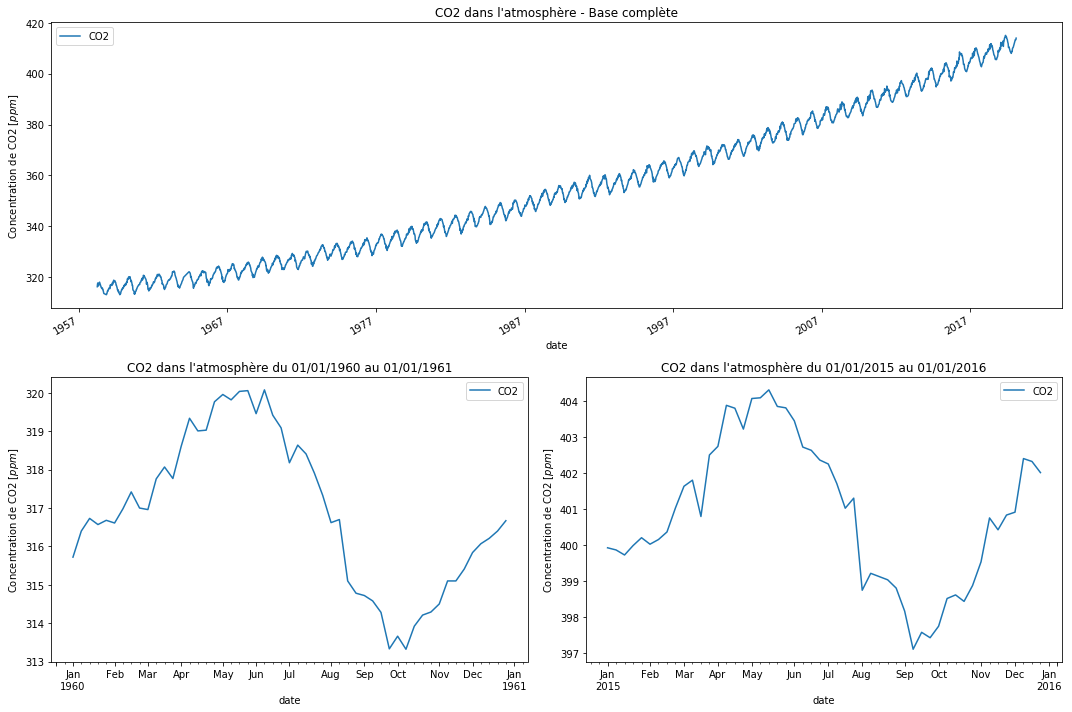

In [6]:
# Initialisation des graphs
# Graphs de 2 périodes différentes de 1 an
fig = plt.figure()
 
# Définition des axes
ax1 = plt.subplot(223)
ax2 = plt.subplot(224)
ax3 = plt.subplot(211)

# Titres des graphs
ax1.set_title("CO2 dans l'atmosphère du 01/01/1960 au 01/01/1961")
ax2.set_title("CO2 dans l'atmosphère du 01/01/2015 au 01/01/2016")
ax3.set_title("CO2 dans l'atmosphère - Base complète")

# Labels des axes
ax1.set_ylabel("Concentration de CO2 [$ppm$]")
ax2.set_ylabel("Concentration de CO2 [$ppm$]")
ax3.set_ylabel("Concentration de CO2 [$ppm$]")

# Graph sur la base complète
data[mask1_1y].plot(ax=ax1, figsize=(15,10))
data[mask2_1y].plot(ax=ax2, figsize=(15,10))
data.plot(ax=ax3, figsize=(15,10))

# Optimisation de l'espacement entre les graphs
fig.tight_layout()

Nous constatons que l'évolution continue du CO2 dans l'atmosphère ne suit pas une courbe linaire. Le tendance est plutôt quadratique.  
Sur année, l'évolution est périodique est semble grossièrement coller à une sinusoïde.

### b. Caractérisation de la tendance continue

Pour cela, nous allons ajuster une courbe quadratique à la base complète en utilisant la librairie *lmfit*.  
Cette courbe suivra la tendance générale des données initiales en "annulant" les oscillations périodiques.

Nous utiliserons le coefficient de détermination ($r²$) pour estimer la qualité de la régression.

In [7]:
# Installation de la librairie lmfit
!pip install lmfit

In [8]:
# Import des librairies
from lmfit.models import QuadraticModel, Model
from sklearn.metrics import r2_score

In [9]:
# Fonction permettant de définir une échelle de temps en lieu et place de l'index temporel de pandas
# Cela est nécessaire pour contourner un bug de la librairie lmfit
def dates_to_idx(timelist):
    reference_time = pd.to_datetime('1958-03-29')
    time = (timelist - reference_time) / pd.Timedelta(1, "Y")
    return np.asarray(time)

time = dates_to_idx(data.index)

In [10]:
# Ajustement de la courbe de tendance sur toutes les données de la base
model = QuadraticModel()
params = model.guess(data['CO2'], x=time)

result = model.fit(data['CO2'], params, x=time)

In [11]:
# Affichage des meilleures paramètres calculés par lmfit
coeffs = result.params.valuesdict()

In [12]:
def fitted_curve(time):
    trend_CO2 = coeffs.get('a')*time*time + coeffs.get('b')*time + coeffs.get('c')
    return np.round(trend_CO2, 2)

In [13]:
# Ajout d'une colonne dans le dataframe data
data['trend_fit'] = pd.Series(fitted_curve(time), index=data.index)

In [14]:
# Estimation du coefficient de détermination
r2_score(data['trend_fit'], data['CO2'])

0.9936252499490063

Le coefficient de détermination est très bon.  
Ce modèle de prédiction suffirait à calculer de bonnes prédictions de CO2 pour les années futures.

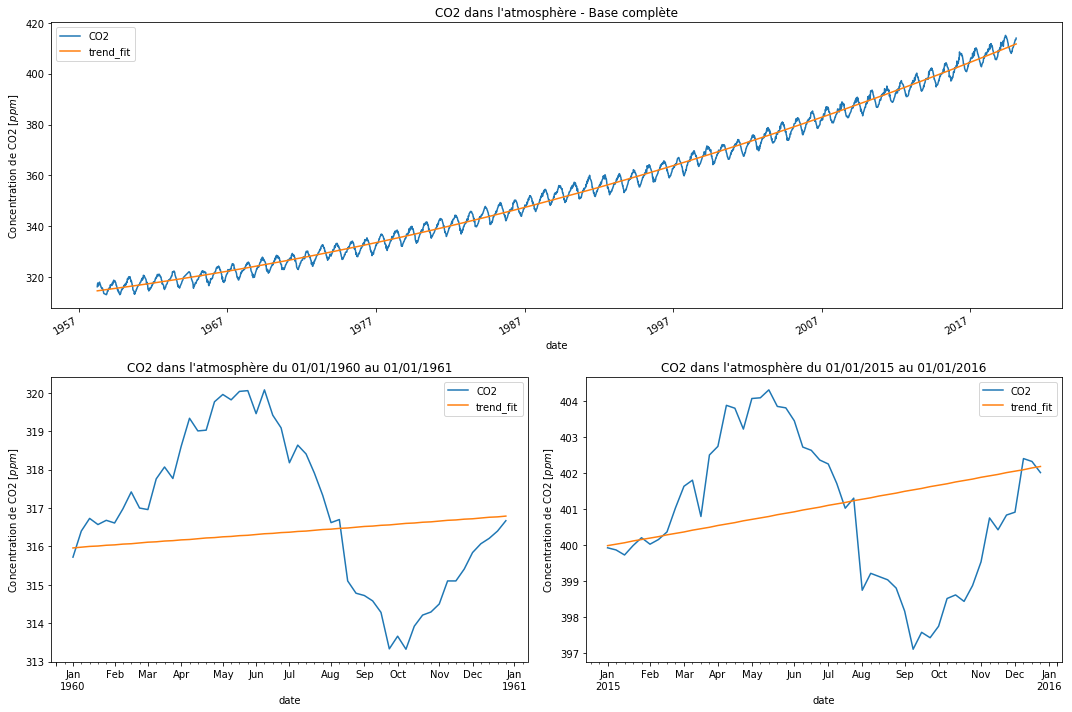

In [15]:
# Initialisation des graphs
# Graphs de 2 périodes distinctes de 1 an
# Avec la courbe de tendance
fig = plt.figure()
 
# Définition des axes
ax1 = plt.subplot(223)
ax2 = plt.subplot(224)
ax3 = plt.subplot(211)

# Titres des graphs
ax1.set_title("CO2 dans l'atmosphère du 01/01/1960 au 01/01/1961")
ax2.set_title("CO2 dans l'atmosphère du 01/01/2015 au 01/01/2016")
ax3.set_title("CO2 dans l'atmosphère - Base complète")

# Labels des axes
ax1.set_ylabel("Concentration de CO2 [$ppm$]")
ax2.set_ylabel("Concentration de CO2 [$ppm$]")
ax3.set_ylabel("Concentration de CO2 [$ppm$]")

# Graph sur la base complète
data[mask1_1y].plot(ax=ax1, figsize=(15,10))
data[mask2_1y].plot(ax=ax2, figsize=(15,10))
data.plot(ax=ax3, figsize=(15,10))

# Optimisation de l'espacement entre les graphs
fig.tight_layout()

#### c. Caractérisation de l'oscillation périodique

Pour avoir un aperçu de l'osclillation périodique, commençons par retraiter les données pour soustraire l'effet de la tendance continue.

In [16]:
# Calculs des données en soustrayant la tendance continue
data['untrend_data'] = data['CO2'] - data['trend_fit'] + data['CO2'][0]

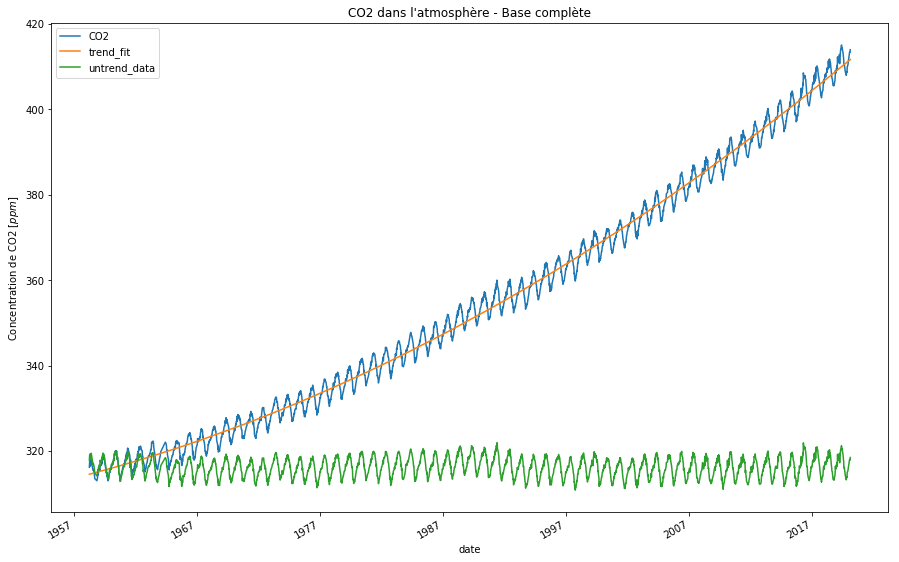

In [17]:
# Initialisation du graph
fig = plt.figure()

# Définition des axes
ax = plt.subplot(111)

# Titre du graph
ax.set_title("CO2 dans l'atmosphère - Base complète")

# Label des axes
ax.set_ylabel("Concentration de CO2 [$ppm$]")

# Graph sur la base complète
data.plot(ax=ax, figsize=(15,10))

La courbe verte représente les données de la variation de CO2 dans l'atmosphère sans l'effet de l'évolution continue que nous avons constaté au début de l'analyse.  
Nous pouvons donc caractériser les oscillations périodiques. Pour cela, nous utiliserons une transformée de Fourier qui détaillera les différents paramètres de ces oscillations.

In [18]:
data[mask1_1y].head(5)

CO2  trend_fit  untrend_data
date                                       
1960-01-02  315.72     315.96        315.95
1960-01-09  316.40     315.98        316.61
1960-01-16  316.73     316.00        316.92
1960-01-23  316.57     316.01        316.75
1960-01-30  316.68     316.03        316.84

In [19]:
data_1y = data[mask1_1y].drop(['trend_fit', 'CO2'], axis=1) - 315.95
time_1y = dates_to_idx(data_1y.index)

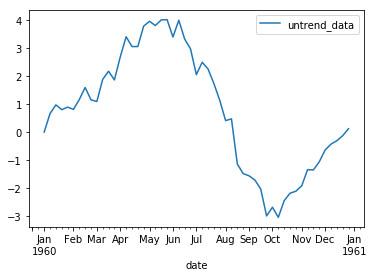

In [20]:
data_1y.plot()

In [58]:
def mysine(x, amp, freq, shift):
    return amp * np.sin(2*np.pi*x*freq) + shift

In [59]:
sinemodel = Model(mysine)
params = sinemodel.make_params(amp=7, freq=1, shift = 0)

In [60]:
result = sinemodel.fit(data_1y['untrend_data'], params, x=time_1y)

In [61]:
coeffs = result.params.valuesdict()

In [62]:
coeffs

OrderedDict([('amp', 2.913657292010378),
             ('freq', 1.0733831551163455),
             ('shift', 0.8693924761163696)])

In [63]:
def fitted_curve(time):
    CO2_1y = coeffs.get('amp')*np.sin(2*np.pi*coeffs.get('freq')*time) + coeffs.get('shift')
    return np.round(CO2_1y, 2)

In [64]:
# Ajout d'une colonne dans le dataframe data
data_1y['fit'] = pd.Series(fitted_curve(time_1y), index=data_1y.index)

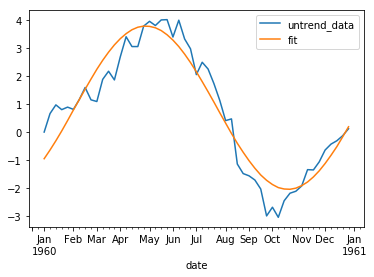

In [65]:
data_1y.plot()